DEC. 14, 2019, AT 8:00 PM
# Video Game Sales with Ratings    
CST 383 - Intro to Data Science   
By [Ethan Herndon](https://www.linkedin.com/in/ethan-herndon-8ba950196/) and [Alicia Sandoval](https://github.com/alicias455)   

## Introduction 
It has been a ongoing question on what makes a best selling game? In this report we will go through the processes of attaining, cleaning, preprocessing, and modeling data to explore this question. This will require data exploration, visualization, and different machine learning methods including classification and cluster analysis. The data set we will be working and exploring with contains information about video game sales in different regions. Our goal is to predict Japan sales based on the genre, platform, and publisher.

## About the Data    
The data was collected from the _kaggle_ <sup>1</sup> webpage on December 3, 2019. It provides detailed information about the sales of different video games in Japan, Europe, North America, and Global sales as well. 

The columns offer further details about each video game, such as
the platform they are offered on, the year each was released, the genre, and the rating, etc.

1. https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## Abstract    
1. [Initial Data Exploration](#head1)    
2. [Preprocessing and Cleaning the Data](#head12)    
3. [Data Exploration](#head123)    
4. [Selecting our Data](#head1234)    
5. [Model](#head123456)    
6. [Conclusion](#head1234567)     
  

In [1]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

## <a name="head1"></a> Initial Data Exploration    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns        
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeRegressor
import graphviz
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from matplotlib.pyplot import show
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy import cluster
from scipy.spatial.distance import pdist
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

df = pd.read_csv('https://raw.githubusercontent.com/HerndonE/VideoGameSalesDataScience/master/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


This data set tells us quite a bit of information. There are    
1. 16719 rows    
2. 16 columns
3. Not many NA values. Only about 5 columns that have a signifcant amount of NA values    
4. 9 of the variables are float types 

In [4]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

Taking the top 5 rows of the data frame, we see that Nintendo takes all 5 positions.  This would make sense because they have been successful since they have entered the Video Game market. In addition, the games listed are known by the masses. Granted, this data frame is just shy of a couple years old, _some games now_ <sup>1</sup> have made it to the top.       

1. https://en.wikipedia.org/wiki/List_of_best-selling_video_games

In [5]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

Using the df.describe() method, we want to take a look at some basic statistical details like percentile, mean, std etc. of the data frame. Something that is really odd is that we can see a game that will be released in 2020. As of the writing of this report, 2020 hasn't happened yet! 

Next, it is important to check the initial count of N/A (or missing) values. This provides more insight on which variables contain greater information since it shows us which columns have low or no N/A values.

In [6]:
df.isna().sum().sort_values(ascending=False)

User_Count         9129
Critic_Count       8582
Critic_Score       8582
Rating             6769
User_Score         6704
Developer          6623
Year_of_Release     269
Publisher            54
Genre                 2
Name                  2
Global_Sales          0
Other_Sales           0
JP_Sales              0
EU_Sales              0
NA_Sales              0
Platform              0
dtype: int64

Here, we notice that User_Count has the most N/A values (about 9,100) showing that it will be difficult to work with since it will have very little significant values. It is a bit interesting how both Critic_Count and Critic_Score have the same amount of N/A values. However, it is more understandable for Rating to have many N/A values as many games are difficult to find a rating for.

## <a name="head12"></a> Preprocessing and Cleaning the Data  

This data set comes from Kaggle, a good source to get clean and quality datasets. When examining this data set, there wasn't any bad data to clean. For example, there wasn't simple mispelling of 'Action' like 'acTion', 'ACTION', 'actien' etc. The only data that we will pursue to clean is 'Year_of_Release', 'Publisher', and 'Genre'. These columns are of interest since genre and publisher are a part of our goal. In addition, the amount of N/A's present and will be dropped in these columns shouldn't be significant to effect our model later.


In [7]:
df.dropna(subset=['Year_of_Release'], inplace=True)
df.dropna(subset=['Publisher'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)

## <a name="head123"></a> Data Exploration

Text(0.5, 0, 'Publisher Names')

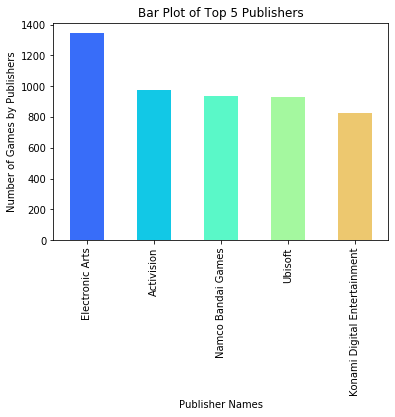

In [8]:
df.Publisher.value_counts().head(5).plot.bar(color=sns.color_palette("rainbow"))
plt.title('Bar Plot of Top 5 Publishers')
plt.ylabel('Number of Games by Publishers')
plt.xlabel('Publisher Names')

The top publisher for games is Electronic Arts with a significant lead over the middle three publishers. Below that plateu is Konami.

Text(0.5, 1, 'North American Sales vs Global Sales by Genre')

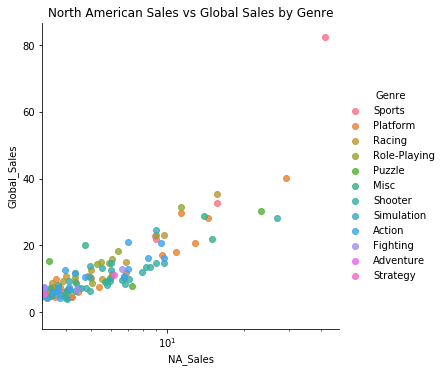

In [9]:
sns.lmplot(x='NA_Sales', y='Global_Sales', data=df,
           fit_reg=False, # No regression line
           hue='Genre')  # Color by evolution stage
plt.xscale('log')
plt.title('North American Sales vs Global Sales by Genre')

By comparing North American sales and Global sales, we wanted to see how Genre affects both markets. One outlier you can see  is the top right pink circle representing sports. If you can recall from our _df.head()_ the game "Wii Sports" is the top game of the data set. This would make sense because the game falls under 'Sports'. In addition the second most outlier is a platform game. As seen in _df.head()_ this game is Super Mario Bros. If you look at the other regions of how "Wii Sports" sold you can see it sold really well in North America as seen in this graph. 

Text(0.5, 1, 'European Sales vs Global Sales by Platform')

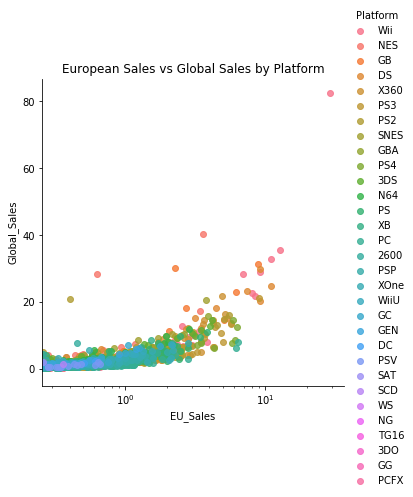

In [10]:
sns.lmplot(x='EU_Sales', y='Global_Sales', data=df,
           fit_reg=False, # No regression line
           hue='Platform')   # Color by evolution stage
plt.xscale('log')
plt.title('European Sales vs Global Sales by Platform')

We then went on to compare European sales and Global sales, hoping to see how Platforms affects both markets. Again we see the the same outlier at the top right, the pink circle representing Wii platform. Also from our _df.head()_ the platform "Wii" is the top platform of the data set. 

Text(0.5, 1, 'Genre Sales on Top 5 Platforms')

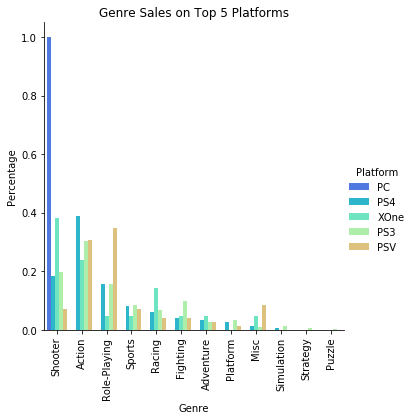

In [11]:
PS4 =  df[(df["Platform"] == "PS4")
     &
    (df["NA_Sales"])
    &
    (df["EU_Sales"])
    &
    (df["JP_Sales"])
]["Genre"]
PS4 = PS4.value_counts()
PS4 = PS4 / PS4.sum()
PS4s = np.full(PS4.size, "PS4")

XOne = df[(df["Platform"] == "XOne")
     &
    (df["NA_Sales"])
    &
    (df["EU_Sales"])
    &
    (df["JP_Sales"])
]["Genre"]
XOne = XOne.value_counts()
XOne = XOne / XOne.sum()
XOnes = np.full(XOne.size, "XOne")

PS3 =  df[(df["Platform"] == "PS3")
     &
    (df["NA_Sales"])
    &
    (df["EU_Sales"])
    &
    (df["JP_Sales"])
]["Genre"]
PS3 = PS3.value_counts()
PS3 = PS3 / PS3.sum()
PS3s = np.full(PS3.size, "PS3")

PSV = df[(df["Platform"] == "PSV")
     &
    (df["NA_Sales"])
    &
    (df["EU_Sales"])
    &
    (df["JP_Sales"])
]["Genre"]
PSV = PSV.value_counts()
PSV = PSV / PSV.sum()
PSVs = np.full(PSV.size, "PSV")

PC = df[(df["Platform"] == "PC")
     &
    (df["NA_Sales"])
    &
    (df["EU_Sales"])
    &
    (df["JP_Sales"])
]["Genre"]
PC = PC.value_counts()
PC = PC / PC.sum()
PCs = np.full(PC.size, "PC")

df3 = pd.DataFrame({
    "Genre": np.concatenate([PC.index, PS4.index, XOne.index, PS3.index, PSV.index]),
    "Percentage": np.concatenate([PC.values, PS4.values, XOne.values, PS3.values, PSV.values]),
    "Platform": np.concatenate([PCs, PS4s, XOnes, PS3s, PSVs])
})

graph3 = sns.catplot(
    data=df3,
    hue="Platform",
    kind="bar",
    palette=sns.color_palette("rainbow"),
    x="Genre",
    y="Percentage",
)
plt.xticks(rotation="vertical");
plt.title('Genre Sales on Top 5 Platforms')

To attain further information about the different platforms we decided to compare the percentage of sales per genre on five different platforms. We immediately noticed that Shooter games are more popular among PC users.

##  <a name="head1234"></a>  Selecting our Data

To look at this data set on the outside looking in, this data set must be relevant. To do this, will look at the data that is from 2009 to the present. It really takes a lot to significantly disrupt the gaming industry, so looking at this portion of the data set shouldn't be misleading. On the other hand, if you wanted to make a game and sell it in Japan, we can see what attributes you would need to make a successful game. Before we pursue any further will drop these columns  _'Name','Developer','User_Count','Critic_Count','Critic_Score','Rating','User_Score','Global_Sales','Other_Sales'_ because these are not the predictors being used.

Text(0, 0.5, 'Publisher Sales')

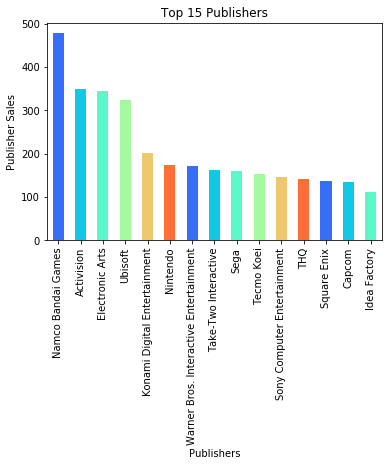

In [12]:
df = df.drop(df[df["Year_of_Release"] <= 2009].index)
df.drop(['Name','Developer','User_Count','Critic_Count','Critic_Score','Rating','User_Score','Global_Sales','Other_Sales'], axis = 1, inplace = True)
df.Publisher.value_counts().head(15).plot.bar(color=sns.color_palette("rainbow"))
plt.title('Top 15 Publishers')
plt.xlabel('Publishers')
plt.ylabel('Publisher Sales')

Here we see the top 15 Publishers and their sales since 2009.

Text(0, 0.5, 'Platform Sales')

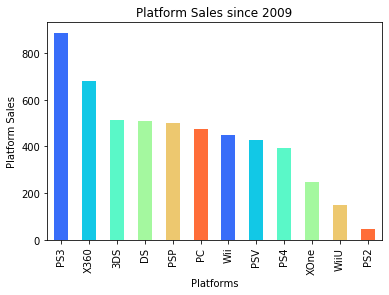

In [13]:
df.Platform.value_counts().plot.bar(color=sns.color_palette("rainbow"))
plt.title('Platform Sales since 2009')
plt.xlabel('Platforms')
plt.ylabel('Platform Sales')

It is interesting to see that not many games were brought out for the PS2 but more than triple the amount were seen for its successor, the PS3.

Text(0, 0.5, 'Genre Sales')

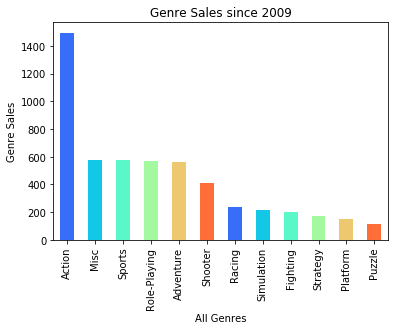

In [14]:
df.Genre.value_counts().plot.bar(color=sns.color_palette("rainbow"))
plt.title('Genre Sales since 2009')
plt.xlabel('All Genres')
plt.ylabel('Genre Sales')

It is not surprising to see that action games do better than the action movies in the box office.

Text(0.5, 1, 'Correlation of features')

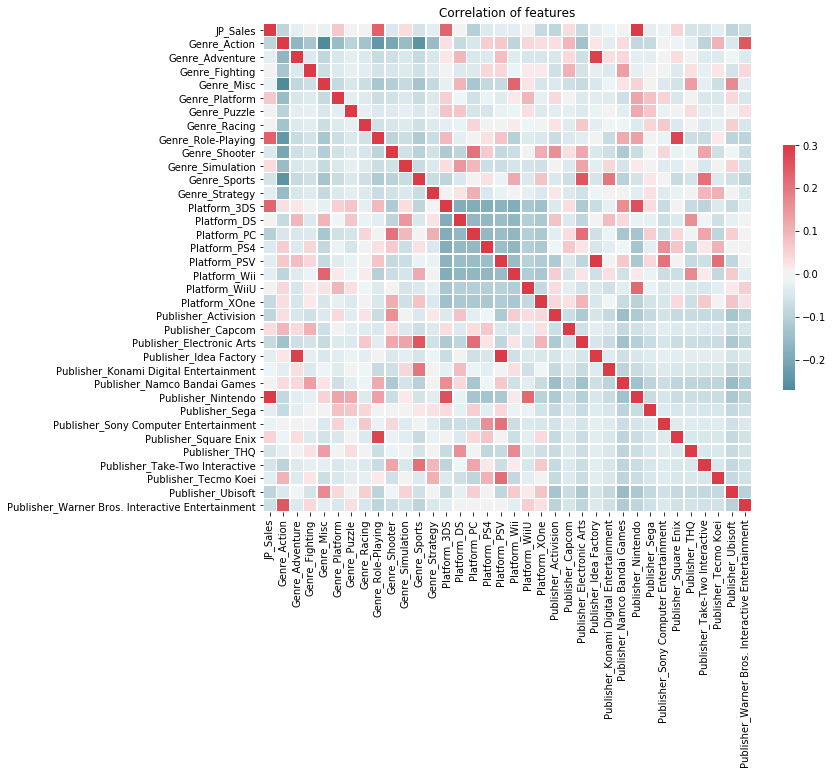

In [15]:
df = df[df.Platform.isin(['DS','3DS','PSV','PC','PS4','XOne','WiiU','Wii'])]
df = df[df.Publisher.isin(['Namco Bandai Games', 'Activision','Electronic Arts','Ubisoft',
                           'Konami Digital Entertainment','Nintendo','Warner Bros. Interactive Entertainment',
                           'Take-Two Interactive','Sega','Tecmo Koei','Sony Computer Entertainment','THQ','Square Enix'
                           ,'Idea Factory','Capcom'])]
df = pd.get_dummies(df, columns=['Genre','Platform','Publisher'])
df = df.drop(columns=['EU_Sales','NA_Sales','Year_of_Release'])
corr = df.corr()
mask = np.zeros_like(corr,dtype=np.bool)
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation of features')

This heatmap gives us a better understanding of the correlation betweeen each Publisher, Platform, Genre, and lastly the sales in Japan for each of the mentioned.

## <a name="head123456"></a>Model 

Now were going to select a JP_Sales as the _y_ value. Setting the model of up for LinearRegression() and by fitting the model.


In [16]:
X =df.apply( zscore ).values
X = df.drop(columns=['JP_Sales'])
y = df.JP_Sales
# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print('Intercept: {:.2f}'.format(lm2.intercept_))
#print("coefficients:")
#for i in range(0, X.columns.size):
    #print("\t"+ X.columns[i] + ": {:.2f}".format(lm2.coef_[i]))
print('r-squared value: {:.2f}'.format(lm2.score(X,y)))
lm2 = lm2.predict(X)
RMSE = np.sqrt(np.mean((y- lm2)**2))
print('RMSE: {:.2f}'.format(RMSE))

Intercept: 41046988562721.39
r-squared value: 0.19
RMSE: 0.30


From the model constructed, we print the intercept, r squared, and rmse. Improving the RMSE also known as Root Mean Squared Error closer to 0 is the goal.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)


remaining = list(range(X_train.shape[1]))
selected = []
n = 35
while len(selected) < n:
    rmse_min = 1e7
    for i in remaining:
        X_i = X_train.iloc[:,selected+[i]]
        scores = cross_val_score(LinearRegression(), X_i, y_train,
        scoring='neg_mean_squared_error', cv=5)
        rmse = np.sqrt(-scores.mean())
        if rmse < rmse_min:
            rmse_min = rmse
            i_min = i
    remaining.remove(i_min)
    selected.append(i_min)
    print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))
print(selected)
list(zip(X, selected))

num features: 1; rmse: 0.34
num features: 2; rmse: 0.33
num features: 3; rmse: 0.33
num features: 4; rmse: 0.33
num features: 5; rmse: 0.33
num features: 6; rmse: 0.32
num features: 7; rmse: 0.32
num features: 8; rmse: 0.32
num features: 9; rmse: 0.32
num features: 10; rmse: 0.32
num features: 11; rmse: 0.32
num features: 12; rmse: 0.32
num features: 13; rmse: 0.32
num features: 14; rmse: 0.32
num features: 15; rmse: 0.32
num features: 16; rmse: 0.32
num features: 17; rmse: 0.32
num features: 18; rmse: 0.32
num features: 19; rmse: 0.32
num features: 20; rmse: 0.32
num features: 21; rmse: 0.32
num features: 22; rmse: 0.32
num features: 23; rmse: 0.32
num features: 24; rmse: 0.32
num features: 25; rmse: 0.32
num features: 26; rmse: 0.32
num features: 27; rmse: 0.32
num features: 28; rmse: 0.32
num features: 29; rmse: 0.32
num features: 30; rmse: 0.32
num features: 31; rmse: 0.33
num features: 32; rmse: 0.33
num features: 33; rmse: 0.33
num features: 34; rmse: 0.33
num features: 35; rmse:

[('Genre_Action', 26),
 ('Genre_Adventure', 7),
 ('Genre_Fighting', 12),
 ('Genre_Misc', 21),
 ('Genre_Platform', 18),
 ('Genre_Puzzle', 14),
 ('Genre_Racing', 19),
 ('Genre_Role-Playing', 8),
 ('Genre_Shooter', 24),
 ('Genre_Simulation', 5),
 ('Genre_Sports', 1),
 ('Genre_Strategy', 13),
 ('Platform_3DS', 20),
 ('Platform_DS', 28),
 ('Platform_PC', 27),
 ('Platform_PS4', 30),
 ('Platform_PSV', 22),
 ('Platform_Wii', 23),
 ('Platform_WiiU', 10),
 ('Platform_XOne', 31),
 ('Publisher_Activision', 15),
 ('Publisher_Capcom', 16),
 ('Publisher_Electronic Arts', 34),
 ('Publisher_Idea Factory', 32),
 ('Publisher_Konami Digital Entertainment', 25),
 ('Publisher_Namco Bandai Games', 17),
 ('Publisher_Nintendo', 3),
 ('Publisher_Sega', 0),
 ('Publisher_Sony Computer Entertainment', 11),
 ('Publisher_Square Enix', 4),
 ('Publisher_THQ', 29),
 ('Publisher_Take-Two Interactive', 2),
 ('Publisher_Tecmo Koei', 33),
 ('Publisher_Ubisoft', 6),
 ('Publisher_Warner Bros. Interactive Entertainment', 9)]

After printing the variables, we xtrain test split the model and use feature selection as seen above.
Now we need to select the best features to get a baseline accuracy. The result of feature selection did not seem very promising. We should be seeing features closer to 0 instead of a consistent number across all columns. A way to get some sort of useful information is to look at the correlation plot displayed earlier. We'll use some known correlated columns like _'Publisher_Nintendo', 'Genre_Role-Playing', 'Platform_3DS'_ for example because they display higher correlation (closer to 0.3) than the other columns.


In [18]:
X=df[['Publisher_Namco Bandai Games',                           
          'Genre_Adventure',              
          'Genre_Fighting',
          'Genre_Misc',
          'Genre_Platform',
          'Publisher_Nintendo',
          'Genre_Role-Playing',
          'Genre_Shooter','Platform_3DS','Genre_Sports']]
def testing():
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0)
    clf=LinearRegression()
    clf.fit(X_train,y_train)
    lm2 = clf.predict(X_test)
    RMSE = np.sqrt(np.mean((y_test - lm2)**2))
    print('RMSE: {:.2f}'.format(RMSE))
testing()  


RMSE: 0.27


Success! We improved our RMSE by reducing it by 0.3.

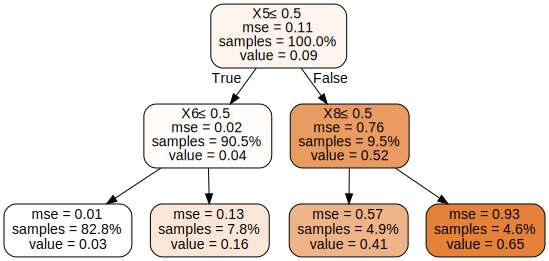

In [19]:
clf = DecisionTreeRegressor(max_depth=2,min_samples_leaf=60,min_samples_split=100,random_state =0)
clf.fit(X,y)

dot_data = export_graphviz(clf, precision=2,
                    feature_names=None,  
                    proportion=True,
                    class_names=y,  
                    filled=True, rounded=True,  
                    special_characters=True)

graph = graphviz.Source(dot_data)  
graph

As seen above, most of the sample is on one side with the MSE equaling zero and a low value hinting towards the best choice.

RMSE: 0.21


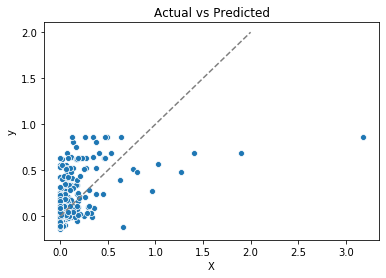

In [20]:
clf = LinearRegression()
clf.fit(X_train, y_train)
lm2 = clf.predict(X_test)
sns.scatterplot(y_test,lm2)
plt.plot([0,2],[0,2],color='grey',linestyle='dashed')
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
#print( metrics.mean_absolute_error(y_test, lm2))
#print( metrics.mean_squared_error(y_test, lm2))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, lm2))))

To explore the curiousity of trying to improve the RMSE score even more. We looked at our fitted model again and made another prediction. Suprisingly, our RMSE score dropped from 0.27 to 0.21. That is a huge improvement and shows that these predictors are really useful to becoming successful in the Japanese gaming market.

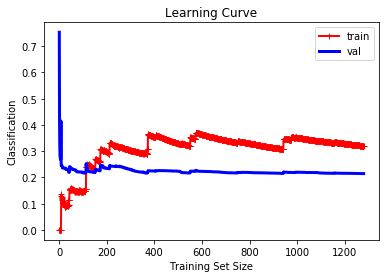

In [21]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Classification")
    plt.legend(loc="best")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

There is a gap between these curves. This means that the model performs significantly better on the training data than on the validataion data which is the hallmark of an overfitting model. If we used a larger training set the gap between curves would get closer.

In [22]:
kmeans= KMeans(n_clusters = 3, random_state =0)
kmeans.fit(X)
cluster_nums = kmeans.predict (X)
kmeans.inertia_

1062.9898502253302

This k-means inertia tells how internally coherent the clusters are. Although not the smallest number, if we were to decrease it more it would increase the number of clusters and we want a balance of the two.

Text(0, 0.5, 'Inertia')

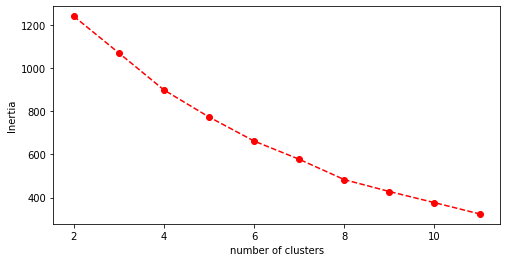

In [23]:
iner = []
k = 3
kmeans = KMeans(n_clusters=k)
ks = list(range(2,12))
for k in ks:
    kmeans = KMeans(n_clusters=k)
    pred_labels = kmeans.fit_predict(X)
    iner.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(ks, iner, 'ro--')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')


In this graph, the value of inertia decreases as the number of clusters increase. So there is a  trade-off here.The elbow point (cluster = 6) in the inertia graph is a good choice because after that the change in the value of inertia isn’t significant.

In [24]:
range_n_clusters = list (range(2,26))
print ("Number of clusters from 2 to 26: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


Number of clusters from 2 to 26: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
For n_clusters = 2, silhouette score is 0.08930537632588759)
For n_clusters = 3, silhouette score is 0.10703229149043197)
For n_clusters = 4, silhouette score is 0.11645120641625208)
For n_clusters = 5, silhouette score is 0.12410799391429267)
For n_clusters = 6, silhouette score is 0.1672983830287959)
For n_clusters = 7, silhouette score is 0.1462881902677356)
For n_clusters = 8, silhouette score is 0.1607752831062231)
For n_clusters = 9, silhouette score is 0.1611440523940955)
For n_clusters = 10, silhouette score is 0.16776098087518787)
For n_clusters = 11, silhouette score is 0.16453404826869003)
For n_clusters = 12, silhouette score is 0.16702991164354145)
For n_clusters = 13, silhouette score is 0.15330137505763317)
For n_clusters = 14, silhouette score is 0.1641444347767414)
For n_clusters = 15, silhouette score is 0.15826063328945128)
For n_clusters = 16, 

For our model, we wanted to check the silhouette score and see how defined the clusters are. Ideally the score compared to structures the closer to 1 the number is the more defined the cluster is. So a 1 would be small groups of points vs a 0 which would just be a cloud of points with no defined structure. In our our case, the silhouette score is close to 0 resulting in a less defined cluster.

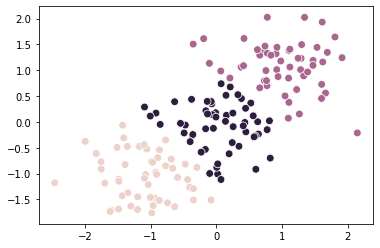

In [25]:
n_points = df["JP_Sales"].sum()
centers = np.array([[1,0], [-1,1], [0,1]])
k = centers.shape[0]
labels_true = np.linspace(0, k-0.001, n_points).astype(int)

std = 0.5
n_points = n_points.astype(int)
x = np.empty(n_points)
y = np.empty(n_points)
for i in range(n_points):
    center = centers[labels_true[i],:]
    x[i] = np.random.normal(center[0], std)
    y[i] = np.random.normal(center[0], std)
    
X = np.stack([x,y], axis=1)

kmeans = KMeans(n_clusters = k, n_init=1)
labels_pred = kmeans.fit_predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_pred, s=60, legend=False)

This shows us three different clusters of the Japan Sales. Since cluster analysis is unsupervised learning, the 3 clusters that are shown are unkown. However from the silhouette score above, the graph reinforces that there is some bad clustering here. Even though there are 3 distinct clusters, they should be tighter together and closer to a score of 1.

## <a name="head1234567"></a> Conclusion

An issue that was presented was picking out which variables/features best helped and did not help pick out which attributes would sell a successful video game in Japan. An issue that was presented was picking out which variables/features to use to build a prediction because feature selection didn't help us pick out which attributes that would sell a successful video game in Japan. However, if were you were to use these predictors of _'Publisher_Namco Bandai Games', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Publisher_Nintendo', 'Genre_Role-Playing', 'Genre_Shooter', 'Platform_3DS', 'Genre_Sports'_ in Japan, you would be making good sales. This was shown to be true because the resulting score was 0.21. In addition, using Nintendo for example is a good predictor because they originated in Japan and have made an enormous amount of successful games/consoles.

In [26]:

HTML('''
<!-- Basic Share Links -->
Share on
<!-- Twitter (url, text, @mention) -->
<a href="https://twitter.com/share?url=<URL>&text=<TEXT>via=<USERNAME>">
    Twitter 
</a>

<!-- Google Plus (url) -->
<a href="https://plus.google.com/share?url=<URL>">
    Google Plus 
</a>

<!-- Facebook (url) -->
<a href="https://www.facebook.com/sharer/sharer.php?u=<URL>">
    Facebook 
</a>

<!-- StumbleUpon (url, title) -->
<a href="https://www.stumbleupon.com/submit?url=<URL>&title=<TITLE>">
    StumbleUpon 
</a>

<!-- Reddit (url, title) -->
<a href="https://reddit.com/submit?url=<URL>&title=<TITLE>">
    Reddit 
</a>

<!-- LinkedIn (url, title, summary, source url) -->
<a href="https://www.linkedin.com/shareArticle?url=<URL>&title=<TITLE>&summary=<SUMMARY>&source=<SOURCE_URL>">
    LinkedIn 
</a> 

<!-- Email (subject, body) -->
<a href="mailto:?subject=<SUBJECT>&body=<BODY>">
     Email 
</a>''')